# NE 250 – Homework 1
## Problem 7
###### 9/22/2017

In [1]:
# Overhead
import numpy as np
from matplotlib import pyplot as plt

## Problem 7

The reproduction factor $\eta$ for reactors is defined as the ratio of neutrons produced to neutrons absorbed,

$$ \eta = \frac{\nu \Sigma_f}{\Sigma_a} $$

For a material with several isotopes, the total macroscopic cross section for a reaction is equal to the sum of the macroscopic cross sections of each component

$$ \Sigma_x = \sum_i \Sigma_{x,i} $$

For a given isotope, the macroscopic cross section, $\Sigma_{x,i}$ can be expressed as the product of the number density and microscopic cross section of the isotope (at the specified energy). Since in this problem we only consider themrmal energies, we will suppress the energy dependence.

$$ \Sigma_{x,i} = n_i \sigma_i $$

Altogether
$$ \eta = \frac{\nu \sum_i n_i \sigma_{f,i}}{\sum_i n_i \sigma_{a,i}} $$

Considering that uranium has two major isotopic components,$^{235}\text{U}$ and $^{238}\text{U}$, we can simplify this further

$$ \eta = \frac{\nu (n_{\text{U5}} \sigma_{f,\text{U5}} + n_{\text{U8}} \sigma_{f,\text{U8}})}{ n_{\text{U5}} \sigma_{a,\text{U5}} + n_{\text{U8}} \sigma_{a,\text{U8}}} $$

In [2]:
# Microscopic cross sections at 0.025 eV [b] (from ENDFB-VII.1, KAERI)
xs_f = {'U235': 585.086,
        'U238': 1.67946E-05
       }
xs_g = {'U235': 98.6864,
        'U238': 2.68261
       }
xs_a = {isotope: xs_f[isotope]+xs_g[isotope] for isotope in xs_f}

We will use the value of $\nu = 2.432$ when the neutron energy is less than 1 eV provided in the class notes.

In [3]:
nu = 2.432

Next, we plot $\eta$ for each percent enrichment (by atom percent) from 0-100%. Note that we can normalize our equation for $\eta$ by an arbitrary total number of atoms in the sample so that we can give $n_i$ as a fractional number density rather than a true number density. In this case, we can write our equation for $\eta$ as

$$\eta = \frac{\nu (n_{\text{U5}} \sigma_{f,\text{U5}} + (1-n_{\text{U5}}) \sigma_{f,\text{U8}})}{ n_{\text{U5}} \sigma_{a,\text{U5}} + (1-n_{\text{U5}}) \sigma_{a,\text{U8}}} $$

In [4]:
def repro_fac(nu,n,xs_f,xs_a):
    numerator = nu*(n*xs_f['U235']+(1-n)*xs_f['U238'])
    denominator = (n*xs_a['U235']+(1-n)*xs_a['U238'])
    return numerator/denominator

In [5]:
percent_u5 = np.arange(101)/100
eta = [repro_fac(nu,n,xs_f,xs_a) for n in percent_u5]

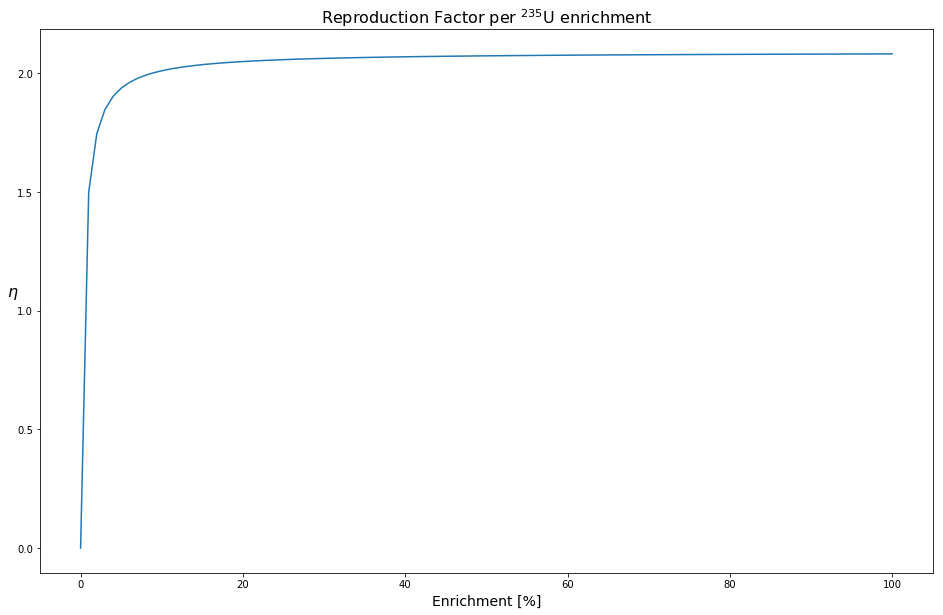

In [6]:
fig = plt.figure(figsize=(16,10))
plt.plot(percent_u5*100,eta)
plt.title('Reproduction Factor per $^{235}$U enrichment',fontsize=16)
plt.xlabel('Enrichment [%]',fontsize=14)
plt.ylabel('$\eta$',rotation=0,fontsize=16)
plt.savefig('fig/eta_per_enrich.jpg')
plt.show()

Solving for $\eta$ in terms of $n_{\text{U5}}$, we find

$$ n_{\text{U5}} = \frac{\nu\sigma_{f,\text{U8}} - \eta\sigma_{a,\text{U8}}}{\eta\sigma_{a,\text{U5}} - \eta\sigma_{a,\text{U8}} - \nu \sigma_{f,\text{U5}} + \nu \sigma_{f,\text{U8}}}$$

In [7]:
def enrich(eta):
    n_U5 = (nu*xs_f['U238']-eta*xs_a['U238'])/(eta*xs_a['U235']-eta*xs_a['U238']-nu*xs_f['U235']+nu*xs_f['U238'])
    return n_U5

A critical reactor requires at a minimum that $\eta = 1$. When this is the case,

In [8]:
min_n_U5 = enrich(eta=1)
print(min_n_U5*100)

0.3616127930806935


A breeder reactor requires at a minimum that $\eta=2$. This means,

In [9]:
min_n_U5_breeder = enrich(eta=2)
print(min_n_U5_breeder*100)

8.831689193621761
